In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


# del X_train,X_test

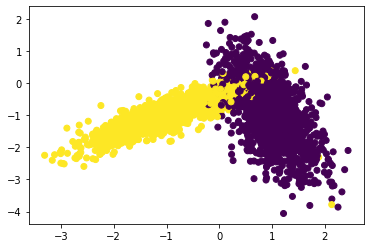

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

[9, 25, 44, 52, 54, 63, 64, 71, 82, 90]
Enter no.of folds in KNN,should be > 2: 10


100%|██████████████████████████████████████████| 10/10 [01:19<00:00,  8.49s/it]



 [0.96, 0.9567555555555556, 0.9572888888888889, 0.9576888888888888, 0.9576740740740741, 0.9577037037037035, 0.9577481481481481, 0.9576444444444443, 0.9572740740740742, 0.9570074074074075] 


 [0.954, 0.9559999999999998, 0.9567999999999998, 0.9571999999999999, 0.9571999999999999, 0.9576, 0.9577333333333332, 0.9574666666666666, 0.9569333333333333, 0.9566666666666667] 



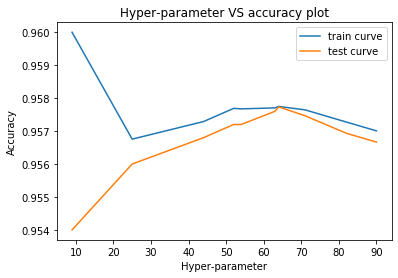

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
#function to calculate the train and test split for each fold
def k_fold(X, y, fold):
    split_size = int(len(X) / fold)  
    X_t1=[]
    X_t2=[]
    for k in range(int(fold)):
        X_train1 = numpy.append((X[:int(k) * int(split_size)]),(X[int(k + 1) * int(split_size):]),axis=0)
        y_train1 = numpy.append((y[:int(k) * int(split_size)]),(y[int(k + 1) * int(split_size):]),axis=0)
        X_test1=X[k * split_size:][:split_size]
        y_test1=y[k * split_size:][:split_size]
        yield X_train1,y_train1, X_test1, y_test1


#Funtion to calulate train and test scores
def RandomSearchCV(X_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = [] 
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for X_train1, y_train1, X_test1, y_test1 in k_fold(X_train, y_train, folds):
            classifier.n_neighbors = k
            classifier.fit(X_train1,y_train1)
            Y_predicted = classifier.predict(X_test1)
            testscores_folds.append(accuracy_score(y_test1, Y_predicted))
            Y_predicted = classifier.predict(X_train1)
            trainscores_folds.append(accuracy_score(y_train1, Y_predicted))
            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores


#1.Calculate parm,10 unique values in the range of (1,100)
params=[]
for x in range (10):
    params.append(random.randint(1, 100))
params.sort()
print(params)

neigh = KNeighborsClassifier()

#2.Split in to groups based on folds
folds=int(input("Enter no.of folds in KNN,should be > 2: "))

trainscores,testscores = RandomSearchCV(X_train,y_train, neigh, params, folds)
print("\n {} \n".format(trainscores))
print("\n {} \n".format(testscores))

plt.plot(params,trainscores, label='train curve')
plt.plot(params,testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.xlabel("Hyper-parameter")
plt.ylabel("Accuracy")
plt.show()





In [7]:

def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

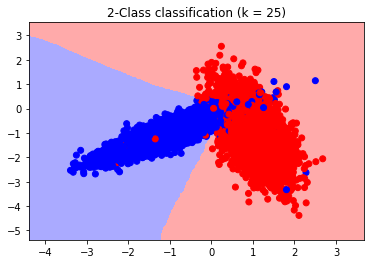

In [8]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 25)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)